In [1]:
from IPython.display import Image

--------------------------------
#### ϵ-Decay Strategies
--------------------------------
- The `ϵ-greedy` strategies have an obvious weakness in that they continue to include random noise no matter how many examples they see. 

- `ϵ-decay` which `reduces the probability of exploration` with every step. This works by defining ϵ as a function of the number of steps, n.

$$ \large \varepsilon(n) = \frac{1}{1+n\beta}$$


Where $\beta<1$ is introduced as a scaling factor to reduce the scaling rate so that the algorithm has sufficient opportunity to explore. 

In this case, we also include +1 in the denominator to prevent infinities from appearing. 

Given this, we can make a few small changes to our previous class of bandits to define an `eps_decay_bandit` class that works on the same principles.

In [1]:
# import modules 
import numpy as np 

import matplotlib.pyplot as plt 

import pandas as pd 
%matplotlib inline

from lolviz import *

In [4]:
class eps_bandit:
    
    def __init__(self, k, eps, iters, mu='random'):
        
        self.k     = k               # Number of arms      
        self.eps   = eps             # Search probability
        self.iters = iters           # Number of iterations
        self.n     = 0               # Step count
        
        self.k_n         = np.zeros(k) # Step count for each arm (options)
        self.mean_reward = 0           # Total mean reward
        self.reward      = np.zeros(iters)
        
        self.k_reward = np.zeros(k)    # Mean reward for each arm
        
        if type(mu) == list: 
        # or type(mu).__module__ == np.__name__:     
            self.mu = np.array(mu)              # User-defined averages
        elif type(mu) == np.ndarray:
            self.mu = mu
        elif mu == 'random':
            self.mu = np.random.normal(0, 1, k) # Draw means from probability distribution
        elif mu == 'sequence':         
            self.mu = np.linspace(0, k-1, k)    # Increase the mean for each arm by one
        
    def pull(self):
        
        p = np.random.rand()                # Generate random number
        
        if self.eps == 0 and self.n == 0:   
            a = np.random.choice(self.k)    # beginning
        elif p < self.eps:      
            a = np.random.choice(self.k)    # Randomly select an action
        else:
            a = np.argmax(self.k_reward)    # Take greedy action
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n      += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n
        
        # Update results for Q(A)
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n           = 0
        self.k_n         = np.zeros(k)
        self.mean_reward = 0
        self.reward      = np.zeros(iters)
        self.k_reward    = np.zeros(k)

- define a class called `eps_decay_bandit` 
    - `k`     - number of arms (int), 
    - `eps`   - probability of random action 0 < eps < 1 (float) 
    - `iters` - number of iterations 
    
- We’ll also define a term `mu` that we can use to adjust the average rewards of each of the arms.
    - mu: set the average rewards for each of the k-arms.
        - Set to "random" for the rewards to be selected from a normal distribution with mean = 0. 
        - Set to "sequence" for the means to be ordered from 0 to k-1.
        - Pass a list or array of length = k for user-defined values.

In [5]:
class eps_decay_bandit:
    
    def __init__(self, k, iters, mu='random'):
        
        self.k     = k               # Number of arms      

        self.iters = iters           # Number of iterations
        self.n     = 0               # Step count
              
        self.k_n         = np.zeros(k) # Step count for each arm (options)
        self.mean_reward = 0           # Total mean reward
        self.reward      = np.zeros(iters)
        
        self.k_reward = np.zeros(k)    # Mean reward for each arm
        
        # Step count for each arm
        self.k_n = np.zeros(k)
        
        # Total mean reward
        self.mean_reward = 0
        self.reward      = np.zeros(iters)
        
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        if type(mu) == list:  
            self.mu = np.array(mu)              # User-defined averages
        elif type(mu) == np.ndarray:
            self.mu = mu
        elif mu == 'random':
            self.mu = np.random.normal(0, 1, k) # Draw means from probability distribution
        elif mu == 'sequence':         
            self.mu = np.linspace(0, k-1, k)    # Increase the mean for each arm by one
        
    def pull(self):
        
        p = np.random.rand()               # Generate random number
        
        if p < 1 / (1 + self.n / self.k):
            a = np.random.choice(self.k)   # Randomly select an action
        else:
            a = np.argmax(self.k_reward)   # Take greedy action
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n      += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n
        
        # Update results for Q(A)
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

Now running the code:

In [6]:
k                 = 10
iters             = 1000
eps_decay_rewards = np.zeros(iters)
eps_1_rewards     = np.zeros(iters)
episodes          = 1000

# Run experiments
for i in range(episodes):
    
    # Initialize bandits
    eps_decay = eps_decay_bandit(k, iters)
    eps_1     = eps_bandit(k, 0.1, iters, eps_decay.mu.copy())
    
    # Run experiments
    eps_decay.run()
    eps_1.run()
    
    # Update long-term averages
    eps_decay_rewards = eps_decay_rewards + ( eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards     = eps_1_rewards +     ( eps_1.reward - eps_1_rewards) / (i + 1)

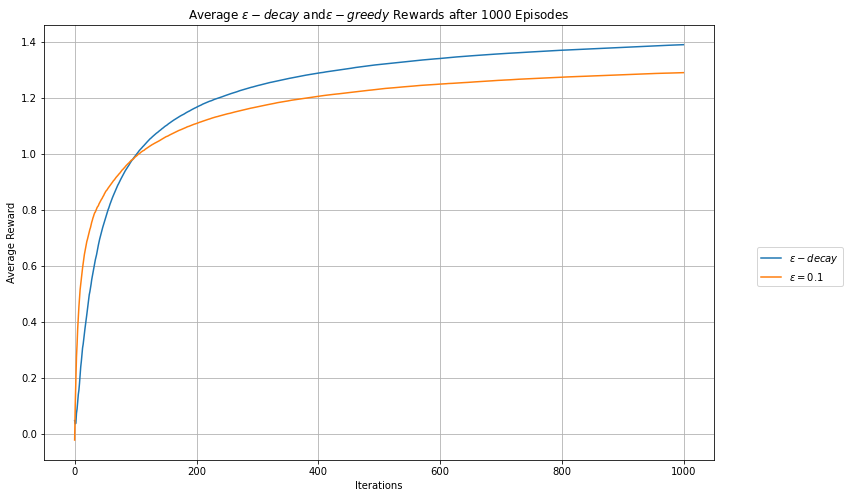

In [7]:
plt.figure(figsize=(12,8))
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-decay$ and" +  "$\epsilon-greedy$ Rewards after "  + str(episodes) + " Episodes")
plt.grid();

The $\epsilon-\text{decay}$ strategy outperforms our previous best algorithm as it sticks to the optimal action once it is found.